In [1]:
# Code for questions 4.32, 4.33 of the new book

In [2]:
# Import modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Import data
in_dir = '/Users/jsmatte/github/ECON662D1/Exo'
in_file = str(in_dir + '/consumption.data.csv')

data = pd.read_csv(in_file, sep = ',', header = None)
data = data[24:]
data = data.drop(columns = [0, 1, 2])
data.columns = ['Yt', 'Ct']
print(data)

           Yt      Ct
24    77918.8   70680
25    78343.0   71328
26    78300.9   71216
27    78995.4   72456
28    77061.9   72052
..        ...     ...
195  390576.6  359372
196  391381.5  363896
197  389502.6  364428
198  388282.1  366224
199  388804.1  371236

[176 rows x 2 columns]


In [4]:
# Add ct and yt to dataset
data['yt'] = np.log(data.Yt)
data['ct'] = np.log(data.Ct)
print(data)

           Yt      Ct         yt         ct
24    77918.8   70680  11.263423  11.165918
25    78343.0   71328  11.268852  11.175044
26    78300.9   71216  11.268314  11.173473
27    78995.4   72456  11.277145  11.190735
28    77061.9   72052  11.252364  11.185143
..        ...     ...        ...        ...
195  390576.6  359372  12.875379  12.792113
196  391381.5  363896  12.877438  12.804623
197  389502.6  364428  12.872626  12.806084
198  388282.1  366224  12.869487  12.811000
199  388804.1  371236  12.870831  12.824593

[176 rows x 4 columns]


In [5]:
# Model (2)

# create data for \Delta ct and \Delta yt
Dct_array = []
for i in range(1, len(data.ct.values)):
    temp_Dct = data.ct.values[i] - data.ct.values[i - 1]
    Dct_array.append(temp_Dct)
Dct = np.array([[i] for i in Dct_array])
print('Dct.shape ->', Dct.shape)

Dyt_array = []
for i in range(1, len(data.yt.values)):
    temp_Dyt = data.yt.values[i] - data.yt.values[i - 1]
    Dyt_array.append(temp_Dyt)
Dyt = np.array([[i] for i in Dyt_array])
print('Dyt.shape ->', Dyt.shape)

# create matrix X of the regressors
X2 = np.zeros((175,4))
for i in range(X2.shape[0]):
    X2[i] = [1, data.ct.values[i], Dyt_array[i], data.yt.values[i]]
    
# Regression Model
model2 = sm.OLS(Dct, X2).fit()
print(model2.summary())

Dct.shape -> (175, 1)
Dyt.shape -> (175, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     13.47
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           6.22e-08
Time:                        22:16:27   Log-Likelihood:                 566.26
No. Observations:                 175   AIC:                            -1125.
Df Residuals:                     171   BIC:                            -1112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [6]:
# Model (1)
c_t = data.ct.values[1:]
print('c_t.shape ->', c_t.shape)

y_t = data.yt.values[1:]
print('y_t.shape ->', y_t.shape)

# create matrix X of the regressors
X1 = np.zeros((175,4))
for i in range(X1.shape[0]):
    X1[i] = [1, data.ct.values[i], y_t[i], data.yt.values[i]]
    
# Regression Model
model1 = sm.OLS(c_t, X1).fit()
print(model1.summary())

c_t.shape -> (175,)
y_t.shape -> (175,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.591e+05
Date:                Wed, 21 Oct 2020   Prob (F-statistic):          2.52e-294
Time:                        22:16:27   Log-Likelihood:                 566.26
No. Observations:                 175   AIC:                            -1125.
Df Residuals:                     171   BIC:                            -1112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [7]:
# Extract model parameters from (2) and define parameters for (1)
params = model2.params
alpha = params[0]
beta = params[1] + 1
gamma0 = params[2]
gamma1 = params[3] - params[2]
print(alpha, beta, gamma0, gamma1)

cov = np.sqrt(model2.scale)
print(cov)

0.06477942407360936 0.9686579216895355 0.29089699718315737 -0.2645656640175612
0.00962724372020131


In [8]:
# Simulation of model (1)
iterates = 176
ct1 = [data.ct.values[0]]
disturbances = []
for t in range(1, iterates):
    u = np.random.normal(0, cov)
    temp_ct = alpha + (beta * ct1[t - 1]) + (gamma0 * data.yt.values[t]) + (gamma1 * data.yt.values[t - 1]) + u
    ct1.append(temp_ct)
    disturbances.append(u)
print(len(ct1))

176


In [9]:
# Model (1) on simulated data
c_ts = ct1[1:]

# create matrix X of the regressors
X1s = np.zeros((175,4))
for i in range(X1s.shape[0]):
    X1s[i] = [1, ct1[i], y_t[i], data.yt.values[i]]

# Regression Model
model1s = sm.OLS(c_ts, X1s).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.591e+05
Date:                Wed, 21 Oct 2020   Prob (F-statistic):          2.52e-294
Time:                        22:16:27   Log-Likelihood:                 566.26
No. Observations:                 175   AIC:                            -1125.
Df Residuals:                     171   BIC:                            -1112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0648      0.022      2.931      0.0

In [10]:
# Residuals
pred_1 = model1.fittedvalues
pred_1s = model1s.fittedvalues
print(len(pred_1))
print(len(pred_1s))

# Residuals of running (1) on simulated data
resid_s = []
for i in range(len(c_ts)):
    resid_s.append(c_ts[i] - pred_1s[i])
print(len(resid_s))

# Residuals of running (1) on real data
resid = []
for i in range(len(c_t)):
    resid.append(c_t[i] - pred_1[i])
print(len(resid))

N = [i for i in range(len(c_t))]

175
175
175
175


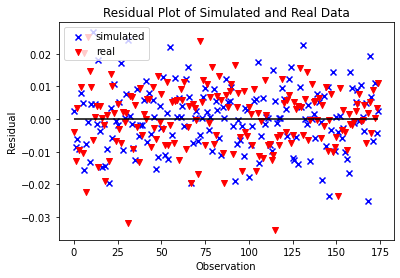

In [11]:
# Plot the residuals
%matplotlib inline
plt.scatter(N, resid_s, c = 'blue', marker = 'x', label = 'simulated')
plt.scatter(N, resid, c = 'red', marker = 'v', label = 'real')
plt.hlines(0, N[0], N[-1])
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('Residual Plot of Simulated and Real Data')
plt.legend(loc = 'upper left')